[0.7377049180327869, 0.7377049180327869, 0.8360655737704918, 0.8032786885245902, 0.8360655737704918, 0.8032786885245902, 0.8524590163934426, 0.8524590163934426, 0.8852459016393442, 0.9016393442622951, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8688524590163934, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8852459016393442, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426, 0.8360655737704918, 0.8524590163934426, 0.8524590163934426, 0.8688524590163934, 0.8524590163934426, 0.8524590163934426, 0.8360655737704918, 0.8524590163934426, 0.8524590163934426, 0.8524590163934426]


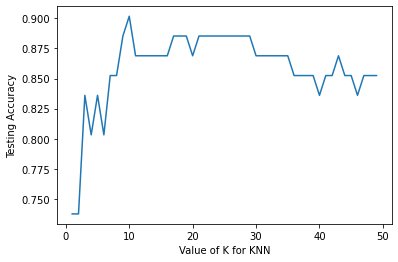

In [2]:
#Example 2

#Step 1: Load libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#Step 2: Load the dataset + Step 9: Rescaling
df = pd.read_csv('C:/MyWorkspace/Python_MachineLearning/KNN/heart.csv')

#Create copy of dataset.
df_model = df.copy()

#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()

features = [['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

#Step 3: Data observation
#print(df.head())
#print(df.shape)
#print(df.info())

#Step 4: Statistical Analysis (Exploratory Data Analysis)

#Target distribution
#print(df['target'].value_counts())

#Histogram of trestbps attribute
# plt.hist(df['trestbps'])
# plt.xlabel('Resting Blood Pressure')
# plt.ylabel('Value')
# plt.show()

#Boxplot of several attributes
# data_to_boxplot = [df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']]
# plt.boxplot(data_to_boxplot)
# plt.xlabel('Attributes')
# plt.ylabel('Value')
# plt.show()

#Check missing values
#print(df.isnull().sum())

#Step 5: Splitting into training and test datasets
training_points = df_model.drop(columns=['target'])
training_labels = df_model['target']

#We want to split the given dataset into training and testing datasets
#test_size = 0.2 means the dataset is divided 20% for testing and 80% for training
#random_state: data is randomly assigned unless you use random_state hyperparameter. If you use random_state=4, your data will be split exactly the same way

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.2, random_state=4)

# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# Step 6: Train the dataset and test accuracy

# #Learning with KNN algorithm when K=3
# classifier = KNeighborsClassifier(n_neighbors = 5)
# classifier.fit(X_train, y_train)
# guesses = classifier.predict(X_test)
# print(guesses)
#
# #Check confusion matrix with sklrean metrics
# print(confusion_matrix(y_test, guesses))
#
# #Check classification accuracy with sklrean metrics
# print(metrics.accuracy_score(y_test, guesses))

# Step 7: Improving accuracy by tuning hyperparameters (number of k)
# Learning with KNN algorithm when K is from 1 to 50
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()